In [ ]:
from platform import python_version

print(python_version())
# 3.7.0

In [22]:
from reframed import load_cbmodel
from reframed import Environment, CAFBA
from carveme.reconstruction.utils import load_media_db
from reframed import fluxes2escher
import copy
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

from graph_functions import *

In [35]:
# Run simulation 1 (ecoli)
models = ["iJN1463.xml", "iJO1366.xml"]
objectives=["R_BIOMASS_KT2440_Core2", "R_BIOMASS_Ec_iJO1366_core_53p95M"]

sol_keys = ["pputida", "ecoli"]
solutions=dict()


mediadb="my_media.tsv"
medium= "M9"
media_db = load_media_db(mediadb, compound_col="compound")
init_env = Environment.from_compounds(media_db[medium])


f= models[1]
print("\nmodel: "+f+"\n==============")
model_e = load_cbmodel(f, flavor="fbc2")
init_env.apply(model_e)
solution = CAFBA(model_e,   objective=objectives[1])  
solutions[sol_keys[1]]=solution
print("solution "+str(solution))


model: iJO1366.xml
solution Objective: 0.7108706214472016
Status: Optimal



In [36]:
# Create spare medium (ecoli)
create_spare_medium(models[1], medium, media_db,outputdir=".",
                    include_original=True,to_remove=["glc__D"], 
                    objective=objectives[1]) # !!


mediadb="tempmedium.tsv"
medium="temp"
print("\nMedio: "+medium+"\n==============")
media_db = load_media_db(mediadb, compound_col="compound")
init_env = Environment.from_compounds(media_db[medium])


Medio: temp


In [38]:
# Run simulation 2 (pputida)
f= models[0]
print("\nmodel: "+f+"\n==============")
model = load_cbmodel(f,flavor="fbc2")
init_env.apply(model)
solution = CAFBA(model,   objective=objectives[0])  
solutions[sol_keys[0]]=solution
print("solution "+str(solution))


model: iJN1463.xml
solution Objective: 0.38676203435384926
Status: Optimal



In [ ]:
# Filter reactions from solution (only pputida)
a, b = solutions['pputida'], solutions["ecoli"]
ar={v:a.values[v] for v in a.values.keys() if a.values[v]!=0}

specific_pputida = {v:a.values[v] for v in ar if v not in b.values.keys()}

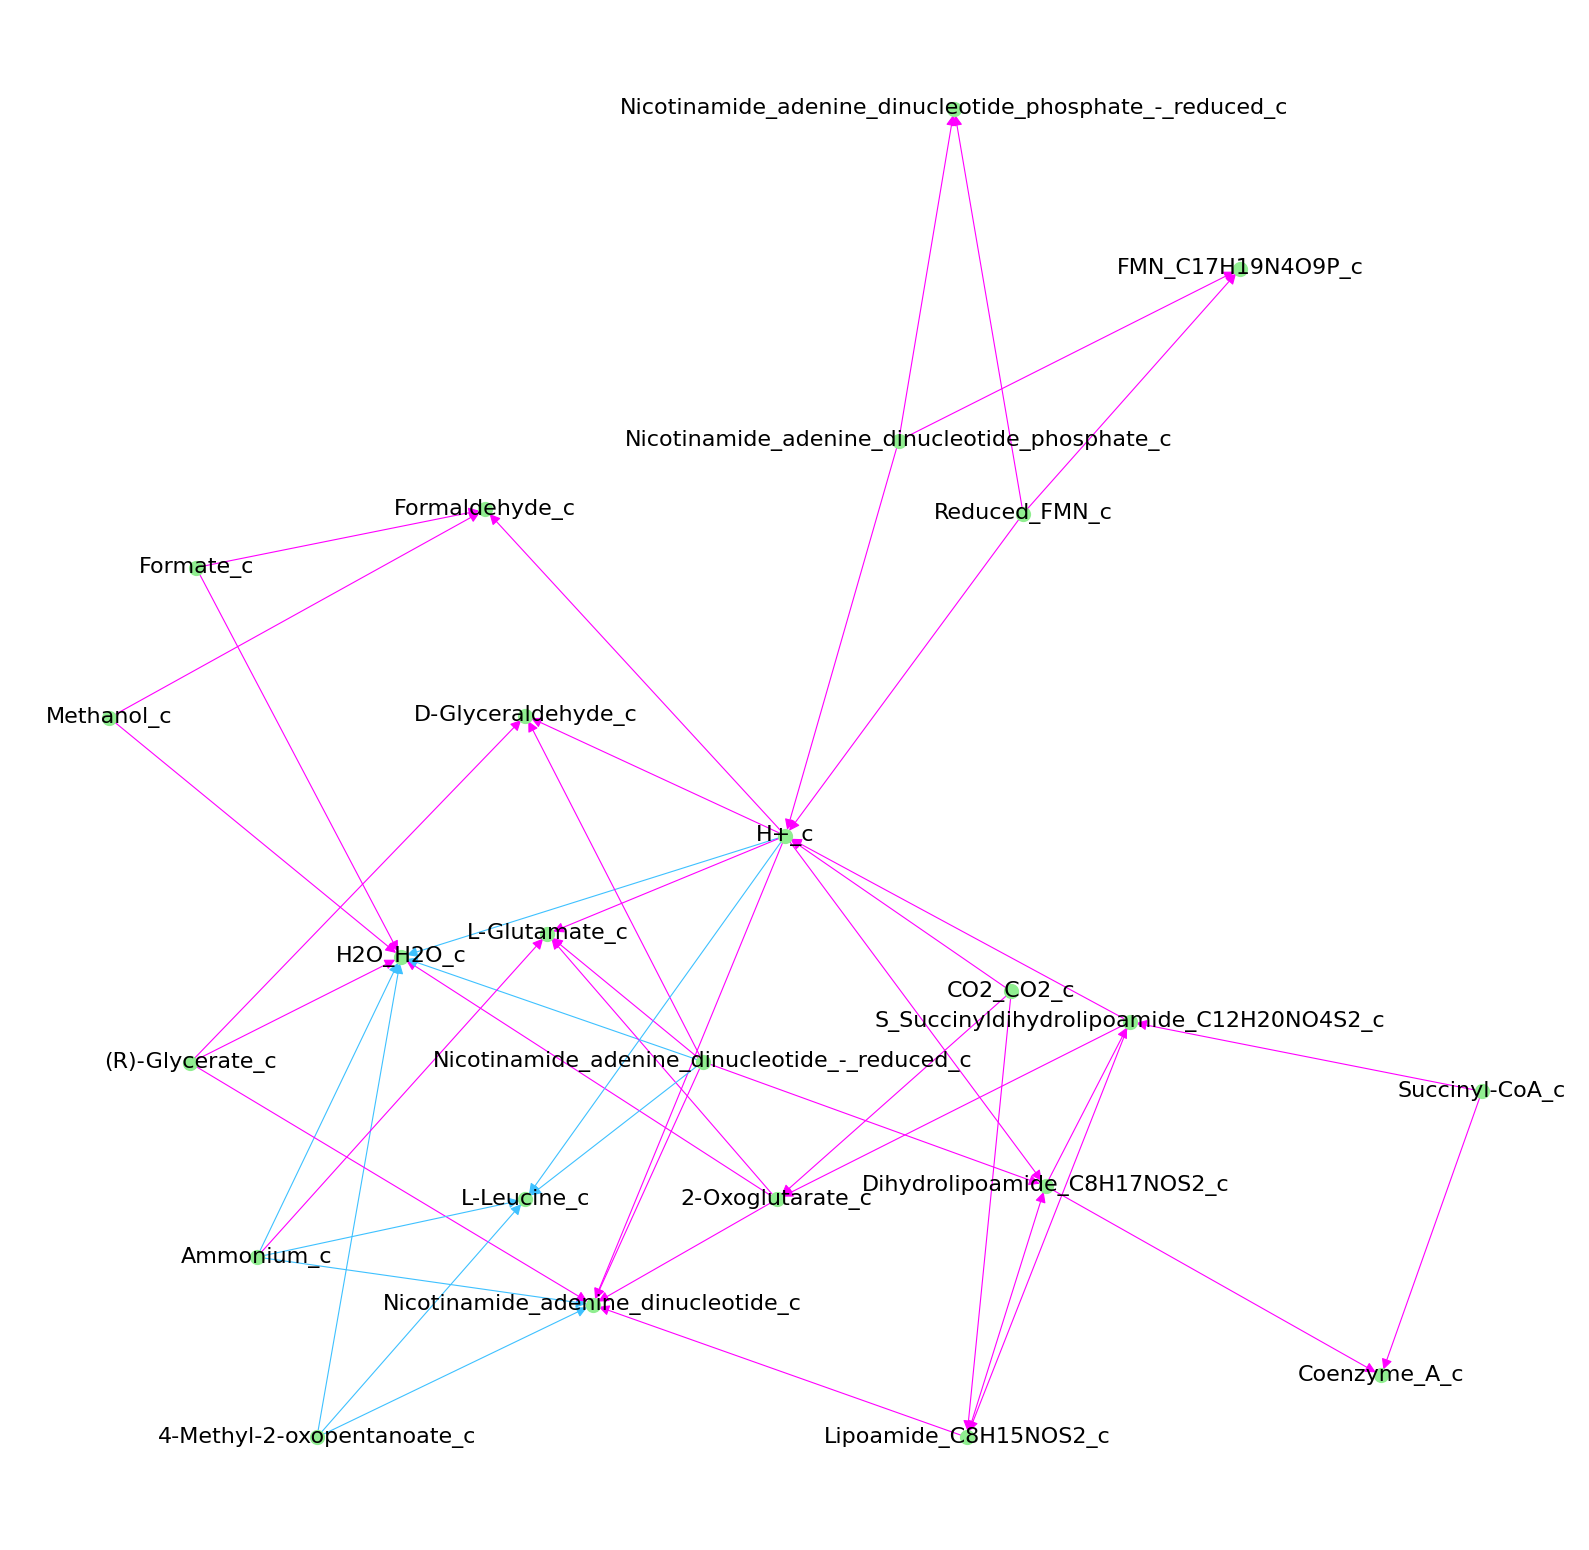

In [46]:
my_reactions = specific_pputida
my_model = model

nt = "bigg_models_metabolites.txt"
code_to_name = metabolite_translator(nt)

minf= 0.2
exi=0
exr=0
textrot=0
fntsize=8
my_figsize=(10,10)

my_draw(my_model, my_reactions, code_to_name, exi, exr, minf, my_figsize, fntsize, textrot)